# Example data analysis notebook

This notebook downloads and analyses some surface air temperature anomaly data from [Berkeley Earth](http://berkeleyearth.org/).

Import the required libraries.

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import warnings

Use the [requests](http://docs.python-requests.org/) library to download the data file for Australia.

In [36]:
def download_data(location):
    '''downloads temperature data anomaly from Berkeley Earth for a given location
    
    Parameters
    ----------
    location: str
        name of the region
    
    Returns
    -------
    
    data: 2D numpy float array
        data table
    '''
    
    url = f'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/{location.lower()}-TAVG-Trend.txt'
    
    # Download the content of the URL
    response = requests.get(url)
    data = np.loadtxt(response.iter_lines(), comments="%")
    
    return data


def moving_avg(data,width):
    '''calculates moving average of temperature anomaly data
    
    Parameters
    ----------
    data: 1D numpy float array
        temperature data
    width: int
        half-width of the moving window used for averaging
    
    Returns
    -------
    moving_avg: 1D numy float array
        averaged data
    '''
    
    moving_avg = np.full(data.size, np.nan)
    for i in range(width, moving_avg.size - width):
        moving_avg[i] = np.mean(data[i - width:i + width])
   
    if len(np.where(np.isnan(moving_avg) == True)) > 0:
        warnings.warn('NAN alert!!!')
    return moving_avg
    

Load the data using numpy (skip the header records which are marked with a `%`).

In [20]:
data = download_data('australia')

Extract the monthly temperature anomaly and calculate an approximate "decimal year" to use in plotting.

In [38]:
decimal_year = data[:, 0] + 1/12*(data[:, 1] - 1)
temperature_anomaly = data[:, 2]

# remove nans

#ind = ~np.isnan(temperature_anomaly)

#temperature_anomaly = temperature_anomaly[ind]
#decimal_year = decimal_year[ind]

Plot the data so we can see what it's like.

(1852.5, 2013.6666666666667)

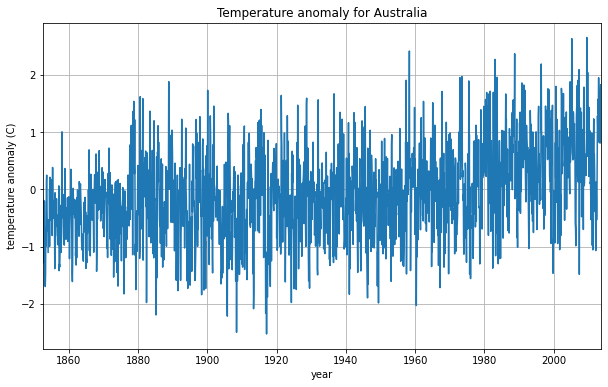

In [33]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())

The data are kind of noisy at this scale so let's calculate a 12-month moving average for a smoother time series.

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: NAN alert!!!


(1852.5, 2013.6666666666667)

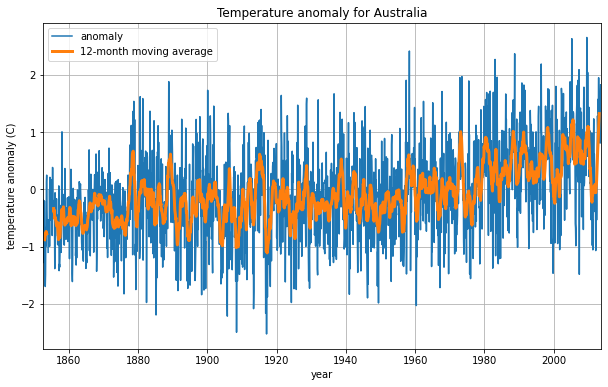

In [39]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly, label="anomaly")
plt.plot(decimal_year, moving_avg(temperature_anomaly, 6), label="12-month moving average", linewidth=3)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.legend()
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())